In [72]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [73]:
responses = []
grades = []
with open('schell8.txt', 'rb') as csvfile:
    responseReader = csv.reader(csvfile, delimiter="\t")
    i = 0
    for row in responseReader:
        if (row[1] == ' DIFFEREN CALCULUS FOR SCIENCE '):
            if "xml" not in row[5]:
                responses.append(row[5])
                grades.append(row[3])

In [75]:
data = {'grades' : grades, 'responses' : responses}
frame = pd.DataFrame(data)
frame

,grades,responses
0,86.08085288947217,How to graph derivatives.
1,64.27691192193511,"<img src=""elementpartimage?modulesessionitemp..."
2,76.063229139755,Expanding upon logrithmic functions.
3,79.39119581733416,I feel comfortable with this topic.
4,89.20222899037542,The one thing from this learning module that ...
5,74.4295279737057,Matching graphs to functions such as f(x)=6^(...
6,67.92444657706228,Nothing really. I understand mostly everything.
7,80.20749145735466,I still find inverse trig functions difficult...
8,74.19959074055015,I am having trouble with drawing the graphs.
9,92.6920314648497,The inverses of the trig functions and how an...


In [76]:
vectorizer = CountVectorizer(min_df=1, stop_words = 'english')


In [77]:
wordVector = vectorizer.fit_transform(responses)

In [78]:
vectorizer.vocabulary_

{u'0833333': 0,
 u'10': 1,
 u'11': 2,
 u'12': 3,
 u'14': 4,
 u'16': 5,
 u'18': 6,
 u'18259743': 7,
 u'25': 8,
 u'2cos': 9,
 u'2x': 10,
 u'32': 11,
 u'32x': 12,
 u'3e': 13,
 u'3xcosx': 14,
 u'5log': 15,
 u'5log10': 16,
 u'5log3': 17,
 u'5x': 18,
 u'6x': 19,
 u'able': 20,
 u'absolute': 21,
 u'absoulute': 22,
 u'acceleration': 23,
 u'accelration': 24,
 u'accept': 25,
 u'actually': 26,
 u'acutal': 27,
 u'acutally': 28,
 u'add': 29,
 u'adding': 30,
 u'addition': 31,
 u'additonal': 32,
 u'advance': 33,
 u'afraid': 34,
 u'afternoon': 35,
 u'aid': 36,
 u'algebra': 37,
 u'algebraically': 38,
 u'alright': 39,
 u'alt': 40,
 u'amp': 41,
 u'angle': 42,
 u'angles': 43,
 u'annoying': 44,
 u'answer': 45,
 u'answers': 46,
 u'apart': 47,
 u'apparently': 48,
 u'application': 49,
 u'applied': 50,
 u'apply': 51,
 u'applying': 52,
 u'approach': 53,
 u'approaches': 54,
 u'approaching': 55,
 u'approches': 56,
 u'approximate': 57,
 u'arccos': 58,
 u'arccsine': 59,
 u'arcsin': 60,
 u'arcsine': 61,
 u'arctan': 6

In [79]:

pca = PCA(n_components=0.6)
pca.fit(wordVector.toarray())



PCA(copy=True, n_components=0.6, whiten=False)

In [80]:
pca.explained_variance_ratio_

array([ 0.05795852,  0.03869448,  0.02859434,  0.02674097,  0.02346875,
        0.01922372,  0.01837864,  0.01760503,  0.01686846,  0.0158582 ,
        0.01548739,  0.01458943,  0.01438759,  0.01391981,  0.01329495,
        0.01249749,  0.01237137,  0.01194857,  0.01153384,  0.01144016,
        0.01108155,  0.01098991,  0.01058876,  0.01020641,  0.00961467,
        0.009338  ,  0.0090857 ,  0.00887625,  0.00883553,  0.00857288,
        0.00832437,  0.00813011,  0.00777022,  0.0075368 ,  0.0074161 ,
        0.00719174,  0.00714798,  0.00690533,  0.00657993,  0.00653611,
        0.00639906,  0.00633725,  0.00615357,  0.00604316,  0.00589535,
        0.00562847])

In [81]:
len(pca.explained_variance_ratio_)

46

In [82]:
pca.components_.shape

(46, 876)

In [83]:
wordVectorReduced = pca.transform(wordVector.toarray())

In [84]:
wordVectorReduced.shape

(574, 46)

In [85]:
Y = np.array(grades, dtype = float)

In [86]:
Y.shape

(574,)

In [87]:
X = pd.DataFrame(wordVectorReduced)

In [88]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-0.111875,0.467369,0.316335,-0.421083,0.131741,-0.036976,0.165529,-0.113150,0.120895,0.264156,...,-0.155386,-0.224106,0.109751,-0.070011,0.090120,-0.011359,0.054621,-0.147286,0.148919,-0.001738
1,0.136069,1.677317,-2.880901,0.226776,-1.085316,-1.023206,-1.834095,1.111220,-0.513669,-0.577693,...,0.435531,-0.292432,-0.052416,-0.241202,-0.877210,0.381077,0.484187,-0.031992,-0.058280,-0.240729
2,-0.093717,-0.168508,0.293523,0.127430,-0.588858,0.041224,0.215229,-0.192463,0.135273,0.027606,...,-0.095787,-0.039247,-0.025450,0.034476,-0.043480,0.057231,0.039026,-0.004615,0.065702,0.104714
3,-0.088479,-0.265067,0.114694,-0.242733,0.050168,-0.085934,-0.006615,-0.006016,0.042294,0.029761,...,0.071688,-0.029991,0.005241,0.000430,0.019639,-0.067513,0.131434,-0.115888,-0.071213,0.181888
4,-0.096996,0.813925,0.222348,0.537225,0.814012,-0.279967,0.636321,0.272740,-0.061601,0.272605,...,0.230369,0.136172,0.314281,0.051069,-0.393169,-0.143122,-0.058569,-0.025813,-0.007141,0.070147


In [89]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
%matplotlib inline 

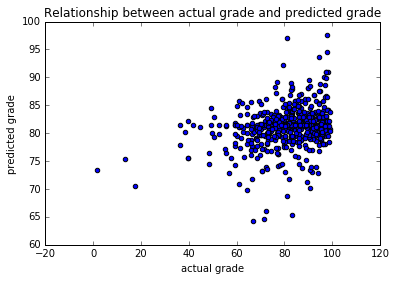

In [92]:
# your turn
plt.scatter(Y, lm.predict(X))
plt.xlabel("actual grade")
plt.ylabel("predicted grade")
plt.title("Relationship between actual grade and predicted grade")

In [93]:
print 'Number of coefficients:', len(lm.coef_)

Number of coefficients: 46


In [94]:
print np.mean((Y - lm.predict(X)) ** 2)

158.953060765
